#Introduction:


Le but de ce projet est de travailler avec un ensemble de donné contenant des informations liées aux taux de pollutions dans le temps et les données météorologique dans certaines stations se trouvant à Beijing et à Londre. A l'aide de cela, nous devons être capable de prédire le taux de concentration de PM2.5, PM10 et 03 pour 35 stations à Beijing et 13 stations à Londre (PM2.5 et PM10). Dans un premier temps, nous allons mettre dans la forme désiré nos données tout en interpollant les champs manquants afin de permettre une prédiction par heure sur le taux de concentration des polluants dans les différentes stations.
Ensuite nous présenterons nos models et les résultats obtenus.


#Beijing

---
On veut donc pouvoir être capable de prédire la qualité de l'air à Beijing, pour cela nous voulons estimer la concentration des polluants PM2.5, PM10 et 03 pour 35 stations se trouvant à des lieux différents.

Pour cela nous avons à notre disposition 7 fichiers contenant des informations liées à la météo et à la qualité de l'air des différentes stations de Beijing.
Dans un premier temps, il est nécessaire d'analyser et de comprendre ces donnés afin de détérminer les informations que nous voulons utiliser pour construire notre modèle. 


Aprés avoir compris ces fichiers, nous avons jugé inutile de prendre en considération les fichiers "beijing_17_18 meo.csv" et  "beijing_201802_201803 me.csv" puisqu'ils contiennent des informations moins exacte que le fichier "Beijing_historical_meo_grid.csv", car celui-ci indique les attributs météorologique à une latitude et longitude donnée à une date précise. Contrairement au deux autres fichiers météo, "Beijing_historical_meo_grid.csv" ne donnent pas des informations liées à des districts de Beijing, ceci est un avantage, car nous ne savons pas quelles stations se trouvent dans quel district alors que nous connaissons leur latitude et longitude avec le fichier "Beijing AirQuality Stations.xlsx". De plus, nous prendrons les données contenues dans les fichiers "beijing_17_18_aq.csv" et "beijing_201802_201803_aq.csv" afin d'obtenir le taux de concentration des polluants à des temps donnés pour chaque station.

Pour pouvoir rendre ces données utilisables par nos futurs modèles, il est indispensable d'effetuer un traitement de ces données afin de les transformer dans la forme voulue. 




---
##Traitement des données:


Initialement, nous allons charger les fichiers nécessaires sous la forme de dataframe à l'aide de la librairie pandas, nous permettant de plus facillement manier les données.

In [12]:
import pandas as pd
import numpy as np


# S'assure que panda affiche toutes les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# Fonction permettant de lire un fichier csv pour retourner la dataframe correspondante.
def get_dataframe(filename):
    df = pd.read_csv(filename)
    return df

# Fonction permettant d'obtenir les éléments présents dans une liste qui ne sont pas dans une autre.
def diff(first, second): 
    second = set(second)
    return [item for item in first if item not in second]

# Si on a déjà les données en mémoire, on les supprime.
if 'aq1' in globals():
  del aq1
if 'aq2' in globals():
  del aq2
if 'meo' in globals():
  del meo
if 'aq_stations' in globals():
  del aq_stations


aq1 = get_dataframe('./final_project_data/beijing_17_18_aq.csv') #stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
aq2 = get_dataframe('./final_project_data/beijing_201802_201803_aq.csv') #stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
meo = get_dataframe('./final_project_data/Beijing_historical_meo_grid.csv') #stationName, longitude, latitue, utc_time, temperature, pressure, humidity, wind_direction, wind_speed/kph

aq_stations = get_dataframe('./final_project_data/Beijing_AirQuality_Stations_en.csv') #Some undefined value du to the conversion to csv (it was a xlsx file) 
                                                                  #-> #"Unnamed: 1": longitude, "Unnamed: 2": latitude, 'Pollutant Species': stationName



#Nettoie Beijing_AirQuality_Station_en.csv
aq_stations = aq_stations.iloc[11:,]
aq_stations = aq_stations.drop("Unnamed: 3", axis=1)
aq_stations.dropna(subset = ["Unnamed: 2"], inplace=True) #Delete row which contains Nan
aq_stations = aq_stations.rename(columns={"Pollutant Species": "StationName"})
aq_stations = aq_stations.rename(columns={"Unnamed: 1": "Longitude"})
aq_stations = aq_stations.rename(columns={"Unnamed: 2": "Latitude"})
print("Pollutions par station jusqu'au 31 janvier 2018: ")
print(aq1)
print("Pollutions par station jusqu'au 31 mars 2018: ")
print(aq2)
print("Données météorologique compléte du 1.1.17 au 27.3.18: ")
print(meo)
print("Nom des stations avec leur latitude et longitude: ")
print(aq_stations)

Pollutions par station jusqu'au 31 janvier 2018: 
              stationId             utc_time  PM2.5   PM10    NO2   CO   O3  SO2
0       aotizhongxin_aq  2017-01-01 14:00:00  453.0  467.0  156.0  7.2  3.0  9.0
1       aotizhongxin_aq  2017-01-01 15:00:00  417.0  443.0  143.0  6.8  2.0  8.0
2       aotizhongxin_aq  2017-01-01 16:00:00  395.0  467.0  141.0  6.9  3.0  8.0
3       aotizhongxin_aq  2017-01-01 17:00:00  420.0  484.0  139.0  7.4  3.0  9.0
4       aotizhongxin_aq  2017-01-01 18:00:00  453.0  520.0  157.0  7.6  4.0  9.0
...                 ...                  ...    ...    ...    ...  ...  ...  ...
311005     zhiwuyuan_aq  2018-01-31 11:00:00    NaN    NaN    NaN  NaN  NaN  NaN
311006     zhiwuyuan_aq  2018-01-31 12:00:00    NaN    NaN    NaN  NaN  NaN  NaN
311007     zhiwuyuan_aq  2018-01-31 13:00:00    NaN    NaN    NaN  NaN  NaN  NaN
311008     zhiwuyuan_aq  2018-01-31 14:00:00    NaN    NaN    NaN  NaN  NaN  NaN
311009     zhiwuyuan_aq  2018-01-31 15:00:00    NaN    NaN 

On remarque que des valeurs sont manquantes et que les intervalles de temps observés ne coicident pas avec le but de notre travail puique nous voulons des données de "training" jusqu'au 20 mars 2018 et des données de test pour le 21 et 22 mars 2018. 

C'est donc pour cela que nous avons définis deux fonctions:
la première nous permet de couper nos tableaux de données selon leur date (daterange) et la deuxième nous permettra de rendre notre courbe de donnée plus lisse (extrapolate) pour ensuite interpoler de façon linéaire leur valeur.

In [13]:
from datetime import timedelta, date, datetime

#Fonction de prendre les valeurs dans un intervale de temps
def daterange(date1, date2):
    for m in range(int ((date2 - date1).days)+1):
        for n in range(24):
            yield date1 + timedelta(days=m,hours=n)


# Extrapolation
from scipy.optimize import curve_fit

# Function to curve fit to the data
def func(x, a, b, c, d):
    return a * (x ** 3) + b * (x ** 2) + c * x + d

def extrapolate(df, stringCols, verbose=False):

    dfStrings = df[stringCols]
    df = df.drop(stringCols, axis=1)

    # Parametre initial
    guess = (0.5, 0.5, 0.5, 0.5)

    # Crée une copie sans Nan pour effectue l'extrapolation
    fit_df = df.dropna()

    # stocke les parametres de nos fonctions pour chaque colonne
    col_params = {}

    
    for col in fit_df.columns:
        x = fit_df.index.astype(float).values
        y = fit_df[col].values
        params = curve_fit(func, x, y, guess)
        col_params[col] = params[0]

    # Extrapole chaque colonne
    for col in df.columns:
        x = df[pd.isnull(df[col])].index.astype(float).values
        df[col][x] = func(x, *col_params[col])

    if verbose:
        for col in col_params:
            print ('f_{}(x) = {:0.3e} x^3 + {:0.3e} x^2 + {:0.4f} x + {:0.4f}'.format(col, *col_params[col]))

    for col in stringCols:
        df[col] = dfStrings[col]
    return df





On veut maintenant mettre ensemble nos deux dataframes qui contiennent les informations liées à la polution, pour ensuite extraire la partie qui nous intéresse de tel sorte qu'elle soit complète.

In [14]:
# On met ensemble nos données
aq = aq1.append(aq2)

# On prend la partie qui nous interrese (date)
start_dt = datetime(2017, 1, 1, 0, 0, 0)
end_dt = datetime(2018, 3, 22, 23, 0, 0)
ran = daterange(start_dt, end_dt)
times = [r.strftime("%Y-%m-%d %H:%M:%S") for r in ran] #Définis l'intervalle de date désirées

#Tout les utc_times ne sont pas présent, on veut donc les ajouters
missing_aq = []
for id in aq.stationId.unique():
    dates_id = aq[aq.stationId == id].utc_time
    missing_dates_id = diff(times, dates_id)
    for date in missing_dates_id:
        missing_aq.append({'utc_time': date, 'stationId': id})

aq = aq.append(missing_aq, ignore_index=True)


# On garde l'intervalle définis
aq = aq.loc[(aq.utc_time >= times[0]) & (aq.utc_time <= times[-1])]

# On trie pour mettre les données dans l'odre
aq = aq.sort_values(['utc_time', 'stationId'])

#On interpole les champs manquants et on effectue l'extrapolation
for station in aq['stationId'].unique():
    aq.loc[aq.stationId == station] = extrapolate(aq.loc[aq.stationId == station].interpolate(method='linear'),['utc_time','stationId'])

print(aq)




                stationId             utc_time       PM2.5        PM10         NO2        CO          O3        SO2
360430    aotizhongxin_aq  2017-01-01 00:00:00   69.932996   97.089615   40.204503  0.956157  132.961799  10.619530
361229        badaling_aq  2017-01-01 00:00:00   71.784150  101.539151   69.454298  1.110830   82.189375   7.142756
362028      beibuxinqu_aq  2017-01-01 00:00:00   69.446673  118.312223   40.530284  1.089999  104.412977   6.030658
362827          daxing_aq  2017-01-01 00:00:00   73.119710  129.766365   39.252133  0.838183  126.362099  11.570621
363626        dingling_aq  2017-01-01 00:00:00   59.427071   86.238030   28.695780  0.681447  129.550561   4.997298
...                   ...                  ...         ...         ...         ...       ...         ...        ...
357245  yongdingmennei_aq  2018-03-22 23:00:00  164.000000  168.000000  103.000000  1.900000    2.000000  11.000000
357989      yongledian_aq  2018-03-22 23:00:00  161.000000  199.000000  

In [15]:
# On veut maintenant ajouter les latitudes et longitude au station correspondante. 

longitude = aq_stations["Longitude"]
latitude = aq_stations["Latitude"]
stationName = aq_stations["StationName"]
aq_stations = aq_stations.sort_values(['StationName'])

# Selon la valeur de la station, on récupere la latitude et la longitude correspondante se trouvant dans choices.
conditions = [(aq["stationId"] == aq_stations.StationName.iloc[0]),(aq["stationId"] == aq_stations.StationName.iloc[1]),
              (aq["stationId"] == aq_stations.StationName.iloc[2]),(aq["stationId"] == aq_stations.StationName.iloc[3]),
              (aq["stationId"] == aq_stations.StationName.iloc[4]),(aq["stationId"] == aq_stations.StationName.iloc[5]),
              (aq["stationId"] == aq_stations.StationName.iloc[6]),(aq["stationId"] == aq_stations.StationName.iloc[7]),
              (aq["stationId"] == aq_stations.StationName.iloc[8]),(aq["stationId"] == aq_stations.StationName.iloc[9]),
              (aq["stationId"] == aq_stations.StationName.iloc[10]),(aq["stationId"] == aq_stations.StationName.iloc[11]),
              (aq["stationId"] == aq_stations.StationName.iloc[12]),(aq["stationId"] == aq_stations.StationName.iloc[13]),
              (aq["stationId"] == aq_stations.StationName.iloc[14]),(aq["stationId"] == aq_stations.StationName.iloc[15]),
              (aq["stationId"] == aq_stations.StationName.iloc[16]),(aq["stationId"] == aq_stations.StationName.iloc[17]),
              (aq["stationId"] == aq_stations.StationName.iloc[18]),(aq["stationId"] == aq_stations.StationName.iloc[19]),
              (aq["stationId"] == aq_stations.StationName.iloc[20]),(aq["stationId"] == aq_stations.StationName.iloc[21]),
              (aq["stationId"] == aq_stations.StationName.iloc[22]),(aq["stationId"] == aq_stations.StationName.iloc[23]),
              (aq["stationId"] == aq_stations.StationName.iloc[24]),(aq["stationId"] == aq_stations.StationName.iloc[25]),
              (aq["stationId"] == aq_stations.StationName.iloc[26]),(aq["stationId"] == aq_stations.StationName.iloc[27]),
              (aq["stationId"] == aq_stations.StationName.iloc[28]),(aq["stationId"] == aq_stations.StationName.iloc[29]),
              (aq["stationId"] == aq_stations.StationName.iloc[30]),(aq["stationId"] == aq_stations.StationName.iloc[31]),
              (aq["stationId"] == aq_stations.StationName.iloc[32]),(aq["stationId"] == aq_stations.StationName.iloc[33]),
              (aq["stationId"] == aq_stations.StationName.iloc[34])]
              
choices = aq_stations['Latitude']
aq['Latitude'] = np.select(conditions,choices,default=1)
choices = aq_stations['Longitude']
aq['Longitude'] = np.select(conditions,choices,default=1)

print(aq)

                stationId             utc_time       PM2.5        PM10         NO2        CO          O3        SO2 Latitude Longitude
360430    aotizhongxin_aq  2017-01-01 00:00:00   69.932996   97.089615   40.204503  0.956157  132.961799  10.619530   39.982   116.397
361229        badaling_aq  2017-01-01 00:00:00   71.784150  101.539151   69.454298  1.110830   82.189375   7.142756   40.365   115.988
362028      beibuxinqu_aq  2017-01-01 00:00:00   69.446673  118.312223   40.530284  1.089999  104.412977   6.030658    40.09   116.174
362827          daxing_aq  2017-01-01 00:00:00   73.119710  129.766365   39.252133  0.838183  126.362099  11.570621   39.718   116.404
363626        dingling_aq  2017-01-01 00:00:00   59.427071   86.238030   28.695780  0.681447  129.550561   4.997298   40.292    116.22
...                   ...                  ...         ...         ...         ...       ...         ...        ...      ...       ...
357245  yongdingmennei_aq  2018-03-22 23:00:00  164.000

Maintenant nous voulons calculer l'aproximation la plus proche de la latitude et longitude des stations se trouvant dans le fichier météo après l'avoir coupé selon la date désirée.

In [16]:
from functools import partial

# Calcule la valeur la plus proche pour une pair de valeur dans une liste de duplet
def nearestValue(liste,value):
  dist=lambda s,d: (s[0]-d[0])**2+(s[1]-d[1])**2 
  return min(liste, key=partial(dist, value))

# On prend la partie qui nous interrese (d)
start_dt = datetime(2017, 1, 1, 0, 0, 0)
end_dt = datetime(2018, 3, 22, 23, 0, 0)
ran = daterange(start_dt, end_dt)
times = [r.strftime("%Y-%m-%d %H:%M:%S") for r in ran]

meo = meo.loc[(meo.utc_time >= times[0]) & (meo.utc_time <= times[-1])]

# Maintenant on veux trouver la latitude et la longitude la plus proche de meo dans aq pour récuperer les donnés météo correspondant
A = meo["longitude"]
B = meo["latitude"]
C = zip(A, B)
C = list(C)

#On récupere toute les valeurs de longitude et latitude
D = aq_stations["Longitude"]
E = aq_stations["Latitude"]
F = list(zip(D,E))

allValue = [nearestValue(C,[float(element[0]),float(element[1])]) for element in F] # Contient la latitude et longitude la plus proche

print(allValue)
print(meo)


[(116.4, 40.0), (116.0, 40.4), (116.2, 40.1), (116.4, 39.7), (116.2, 40.3), (117.1, 40.1), (116.4, 39.9), (116.5, 39.9), (116.1, 39.7), (116.3, 39.9), (116.3, 39.9), (116.2, 39.9), (116.6, 40.3), (116.0, 39.6), (116.1, 39.9), (116.8, 40.4), (116.9, 40.5), (116.4, 39.9), (116.5, 39.9), (116.2, 40.2), (117.1, 40.1), (116.4, 39.9), (116.7, 40.1), (116.4, 39.9), (116.7, 39.9), (116.3, 40.0), (116.4, 39.9), (116.3, 40.0), (116.0, 40.5), (116.5, 39.8), (116.4, 39.9), (116.8, 39.7), (116.3, 39.5), (116.1, 39.8), (116.2, 40.0)]
              stationName  longitude  latitude             utc_time  temperature  pressure  humidity  wind_direction  wind_speed/kph
0        beijing_grid_000      115.0      39.0  2017-01-01 00:00:00        -5.47    984.73     76.60           53.71            3.53
1        beijing_grid_001      115.0      39.1  2017-01-01 00:00:00        -5.53    979.33     75.40           43.59            3.11
2        beijing_grid_002      115.0      39.2  2017-01-01 00:00:00        

Désormais, nous voulons insérer dans nos données les attributs du fichier météorologique qui nous interesse. Pour cela, nous sélectionons les parties de aq contenant les stations à la latitude et longitude exacte et nous la concatenons à un tableau de la même taille contenant les données météorologiques à une position approximée.
En faisant cela, nous avons remarqué des duplications dans nos utc_times, car nos tableaux n'étaient pas de la même taille. Par conséquent, nous les enlevons avant d'effectuer cette opération.

In [17]:
#On enleve les duplications et stocke dans aq_concat2

# On index par utc_time afin d'enlever les duplications dans l'index
if not aq.index.name == 'utc_time':
  aq = aq.set_index(['utc_time'])

#Contient la premiere station sans duplication
aq_concat = aq[aq.stationId == aq.stationId.unique()[0]]
stations = aq.stationId.unique()[1:]
aq_concat = aq_concat.loc[~aq_concat.index.duplicated(keep='first')]

#Nous ajoutons chaque station sans duplication au tableau définis précédemment
for i in range(1,35):
  aq_concat2 = aq[aq.stationId == aq.stationId.unique()[i]]
  aq_concat = aq_concat.append(aq_concat2.loc[~aq_concat2.index.duplicated(keep='first')])

aq = aq_concat # On stocke dans aq

#On stocke l'index contenant nos utc-times
times = aq.index

# Clean l'index 
aq_stations = aq_stations.reset_index(drop=True)

# On déclare nos deux premiers tableaux pour effectuer l'opèration désirée
# On selectionne les parties à l'aide de deux booléeans donnés par la latitude et longitude.
stationBool = aq['Longitude'] == "116.397"  
stationBool2 = aq['Latitude'] == "39.982" 
station1 = aq[stationBool & stationBool2]

meoBool = meo['longitude'] == 116.4 
meoBool2 = meo['latitude'] == 40.0
meo1 = meo[meoBool & meoBool2]

# Clean Index pour effectuer la concaténation
station1 = station1.reset_index(drop=True)
meo1 = meo1.reset_index(drop=True)
# On concatene les attributs qui nous interrese.
station1 = pd.concat([station1, meo1[["temperature",'pressure','humidity','wind_direction','wind_speed/kph']]], axis=1)

# On fait la même chose pour chaque autre station
for i in range(1,35):
  stationBool = aq['Longitude'] == str(aq_stations['Longitude'][i])  
  stationBool2 = aq['Latitude'] == str(aq_stations['Latitude'][i]) 
  stationPart = aq[stationBool & stationBool2]
  meoBool = meo['longitude'] == allValue[i][0] 
  meoBool2 = meo['latitude'] == allValue[i][1]
  meoPart = meo[meoBool & meoBool2]
  stationPart = stationPart.reset_index(drop=True)
  meoPart = meoPart.reset_index(drop=True)
  station1 = station1.append(pd.concat([stationPart, meoPart[["temperature",'pressure','humidity','wind_direction','wind_speed/kph']]], axis=1))

# Clean l'index
station1 = station1.reset_index(drop=True)
# On stocke le résultat dans aq.
aq = station1
print(aq)




              stationId      PM2.5       PM10        NO2        CO          O3        SO2 Latitude Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
0       aotizhongxin_aq  69.932996  97.089615  40.204503  0.956157  132.961799  10.619530   39.982   116.397        -5.96   1019.95     68.60          132.90            4.51
1       aotizhongxin_aq  69.932406  97.089357  40.204104  0.956148  132.963853  10.619316   39.982   116.397        -3.36   1019.82     58.43          141.39            4.17
2       aotizhongxin_aq  69.931817  97.089099  40.203705  0.956140  132.965906  10.619101   39.982   116.397        -0.77   1019.69     48.27          151.13            3.93
3       aotizhongxin_aq  69.931227  97.088841  40.203307  0.956131  132.967960  10.618887   39.982   116.397         1.82   1019.55     38.10          161.75            3.82
4       aotizhongxin_aq  69.930637  97.088583  40.202908  0.956122  132.970013  10.618672   39.982   116.397         2.97   1018.8

In [18]:
# On remet utc_time pour ordonner les données.
aq.insert(0, 'utc_time', times)

#Convertion en numérique
aq["Latitude"] = pd.to_numeric(aq["Latitude"])
aq["Longitude"] = pd.to_numeric(aq["Longitude"])

#On ordonne
aq = aq.sort_values(['utc_time', 'stationId'])

#On enleve le station_id
aq = aq.drop(['stationId'], axis=1)

# Clean Index
aq = aq.reset_index(drop=True)

print(aq)

                   utc_time       PM2.5        PM10         NO2        CO          O3        SO2  Latitude  Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
0       2017-01-01 00:00:00   69.932996   97.089615   40.204503  0.956157  132.961799  10.619530    39.982    116.397        -5.96   1019.95     68.60          132.90            4.51
1       2017-01-01 00:00:00   71.784150  101.539151   69.454298  1.110830   82.189375   7.142756    40.365    115.988        -6.29    946.71     72.23          306.26            7.32
2       2017-01-01 00:00:00   69.446673  118.312223   40.530284  1.089999  104.412977   6.030658    40.090    116.174        -6.10    999.06     72.34          338.39            0.69
3       2017-01-01 00:00:00   73.119710  129.766365   39.252133  0.838183  126.362099  11.570621    39.718    116.404        -5.59   1022.43     78.05          107.16            3.98
4       2017-01-01 00:00:00   59.427071   86.238030   28.695780  0.681447  129.550561

Nous pouvons maintenant définir nos données d'entrainement et nos données de test en effectuant un tri sur leur date.

In [19]:
if not aq.index.name == 'utc_time':
    aq = aq.set_index(['utc_time'])
x_train = aq[aq.index < '2018-03-21']
x_test = aq[aq.index > '2018-03-21']
Y = aq[['PM2.5', 'PM10', 'O3']] # On selectionne uniquement les trois attributs à prédire
y_train = Y[aq.index < '2018-03-21']
y_test = Y[aq.index > '2018-03-21']

print(x_test)
print(x_train)
print(y_train)
print(y_test)


                     PM2.5   PM10    NO2   CO    O3   SO2  Latitude  Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
utc_time                                                                                                                                       
2018-03-21 00:00:00   55.0   93.0   72.0  1.0   2.0   5.0    39.982    116.397         4.63   1018.13     19.57          114.55            1.89
2018-03-21 00:00:00   42.0   70.0   86.0  0.4   2.0   8.0    40.365    115.988         1.26    946.15     22.80           78.44            2.73
2018-03-21 00:00:00   52.0  108.0   73.0  1.0   2.0   3.0    40.090    116.174         3.90    997.29     21.65           68.13            2.29
2018-03-21 00:00:00   39.0   79.0   59.0  1.4  16.0  18.0    39.718    116.404         3.99   1020.92     19.97          230.54            7.50
2018-03-21 00:00:00   31.0   43.0   39.0  0.7  17.0   2.0    40.292    116.220         2.69    976.66     22.11           57.81         

La conversion en numpy facilite l'ordonnement de nos données, puisque nous voulons maintenant pour chaque utc_time obtenir une ligne contenant les informations des 35 stations. Ensuite nous supprimons la dernière ligne de 
X et la première ligne de Y pour pouvoir prédire les conditions météorologiques à l'heure qui suit.

In [20]:
# Convertie en numpy pour pouvoir effectuer le reshape désiré.
nbXattribut = 13
nbYattribut = 3
nbrStation = 35
def reshape(frame, nbStation):
  return frame.to_numpy().reshape(int(frame.shape[0]/nbStation),nbStation*frame.shape[1])

x_train = reshape(x_train,nbrStation)
x_test = reshape(x_test,nbrStation)
y_train = reshape(y_train,nbrStation)
y_test = reshape(y_test,nbrStation)

print("verify size of x_train: ")
print(len(x_train[0]))
print(nbrStation * nbXattribut)
print("")
print("verify size of x_train: ")
print(len(x_train[0]))
print(nbrStation * nbXattribut)
print("")

print("verify size of y_train: ")
print(len(y_train[0]))
print(nbrStation * nbYattribut)
print("")

print("verify size of y_test: ")
print(len(y_test[0]))
print(nbrStation * nbYattribut)
print("")

# Delete first row of y and last of x , Because we want y to have the value of the next hours

x_train = np.delete(x_train,-1,0)
x_test = np.delete(x_test,-1,0)

y_train = np.delete(y_train,0,0)
y_test = np.delete(y_test,0,0)



verify size of x_train: 
455
455

verify size of x_train: 
455
455

verify size of y_train: 
105
105

verify size of y_test: 
105
105



##Modèles


---

Nous pouvons désormais définir nos modèles à l'aide de la librarie sklearn, mais avant cela nous définissons une fonction nous permettant d'afficher les résultats et les plots obtenus.

In [21]:
# Plots
import matplotlib.pyplot as plt

def plot_model_prediction(mod):
    # fait la prédiction
    prediction = mod.predict(x_test)

    # Evalue la précision du model
    from sklearn.metrics import mean_absolute_error, median_absolute_error
    print("Test")
    print("The Explained Variance: %.2f" % mod.score(x_test, y_test))
    print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, prediction))
    print("The Median Absolute Error: %.2f " % median_absolute_error(y_test, prediction))
    print("Train")
    pred_train = mod.predict(x_train)
    print("The Explained Variance: %.2f" % mod.score(x_train, y_train))
    print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_train, pred_train))
    print("The Median Absolute Error: %.2f " % median_absolute_error(y_train, pred_train))


    y_prediction = np.copy(y_test)
    y_prediction[:] = prediction

    fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(y_test)
    plt.show()

    fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(y_prediction)
    plt.show()

###Regression linaire 

Test
The Explained Variance: 0.79
The Mean Absolute Error: 8.92 
The Median Absolute Error: 7.01 
Train
The Explained Variance: 0.94
The Mean Absolute Error: 9.14 

C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



The Median Absolute Error: 5.91 


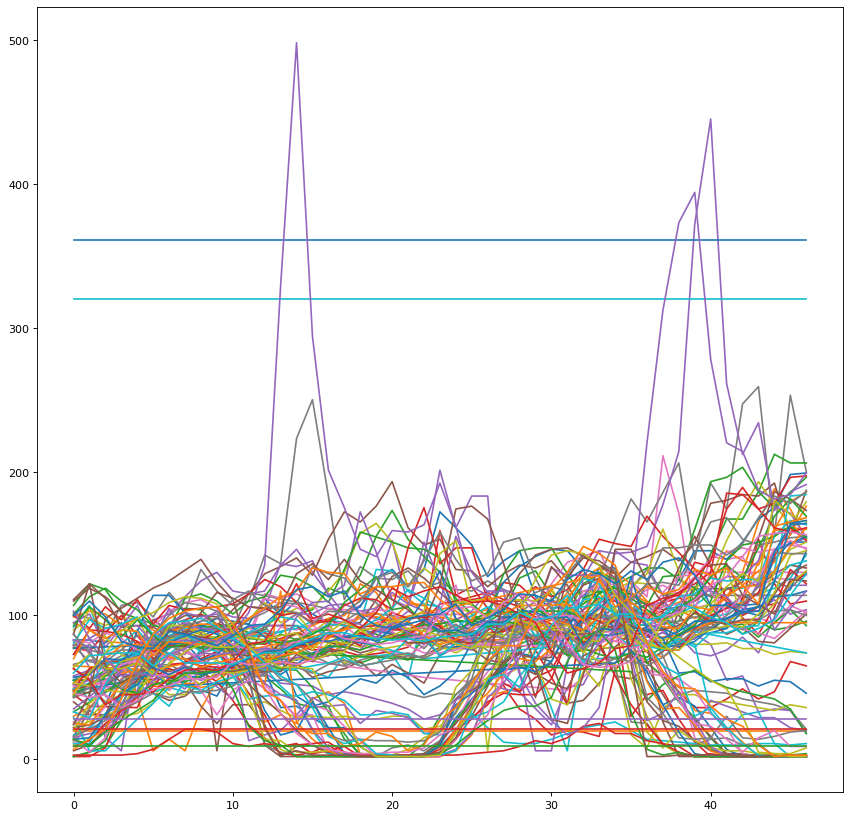

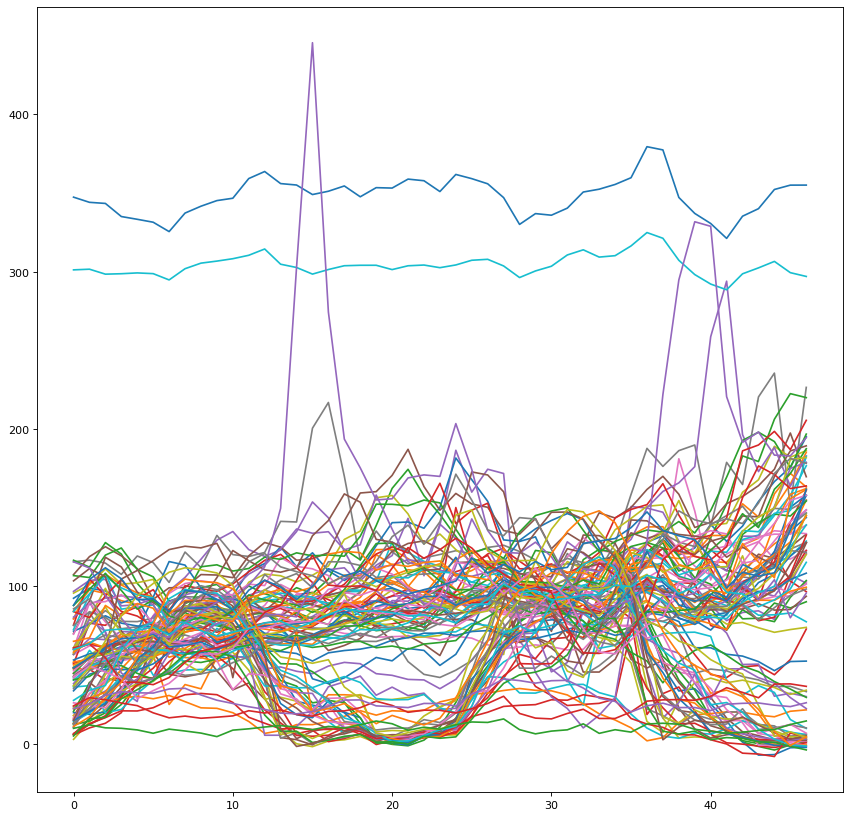

In [22]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

plot_model_prediction(regr)

###MLP Regressor

Test
The Explained Variance: 0.65
The Mean Absolute Error: 12.90 
The Median Absolute Error: 10.52 
Train


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


The Explained Variance: 0.91
The Mean Absolute Error: 12.86 
The Median Absolute Error: 8.80 


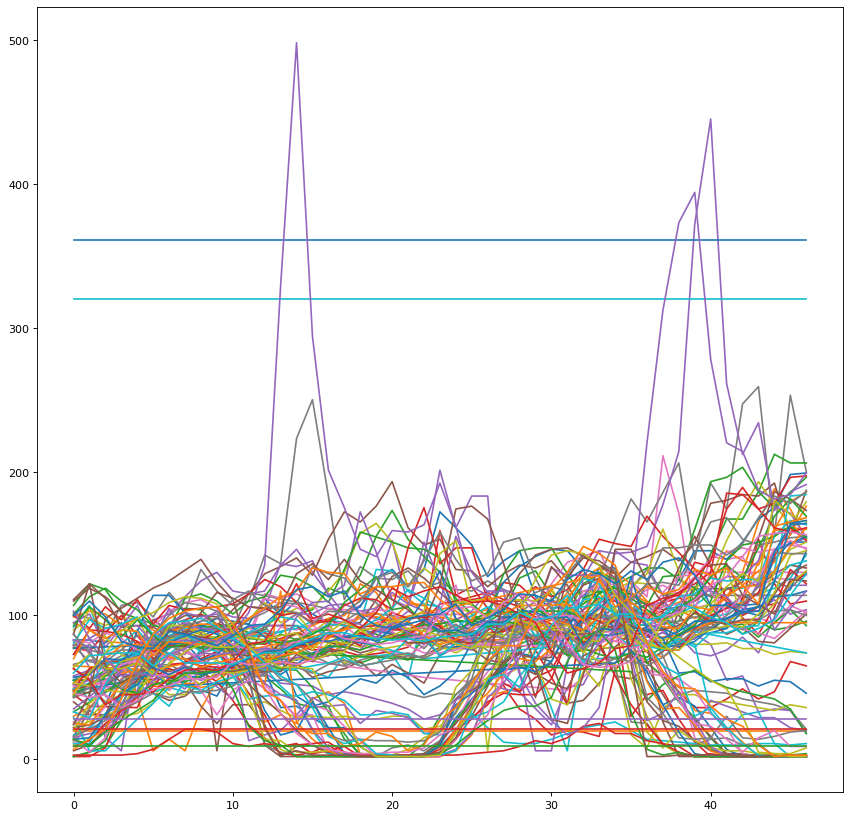

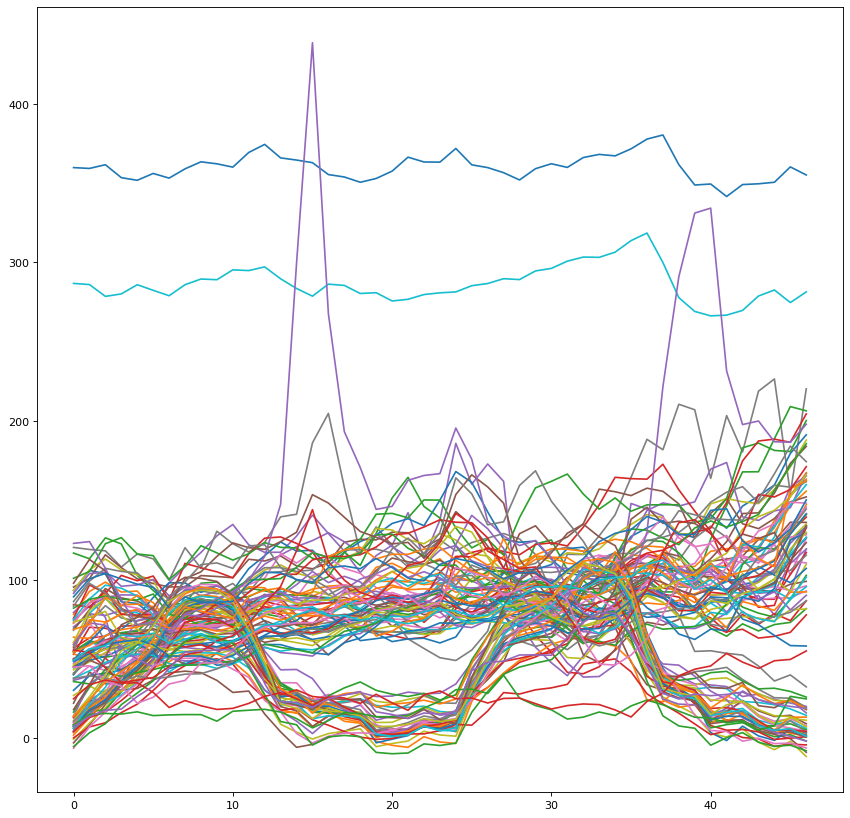

In [23]:
from sklearn.neural_network import MLPRegressor

regr_2 = MLPRegressor(random_state=1, max_iter=1000) 
regr_2.fit(x_train, y_train)

plot_model_prediction(regr_2)

###MultiOutput Regressor

Test
The Explained Variance: 0.71
The Mean Absolute Error: 8.91 
The Median Absolute Error: 6.94 
Train
The Explained Variance: 0.95
The Mean Absolute Error: 9.13 
The Median Absolute Error: 5.88 


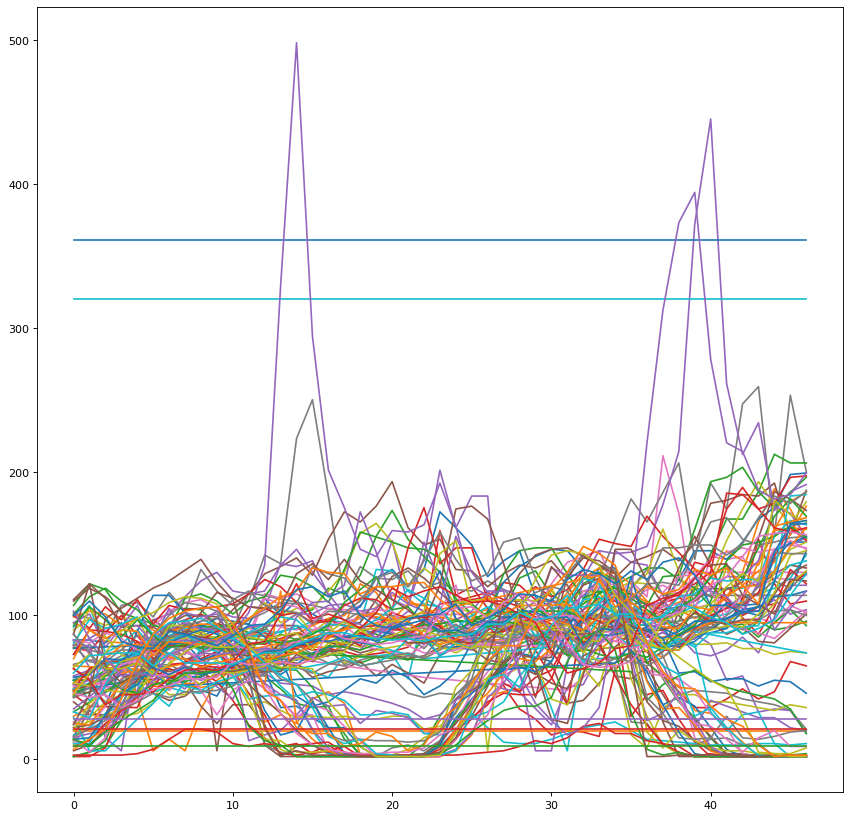

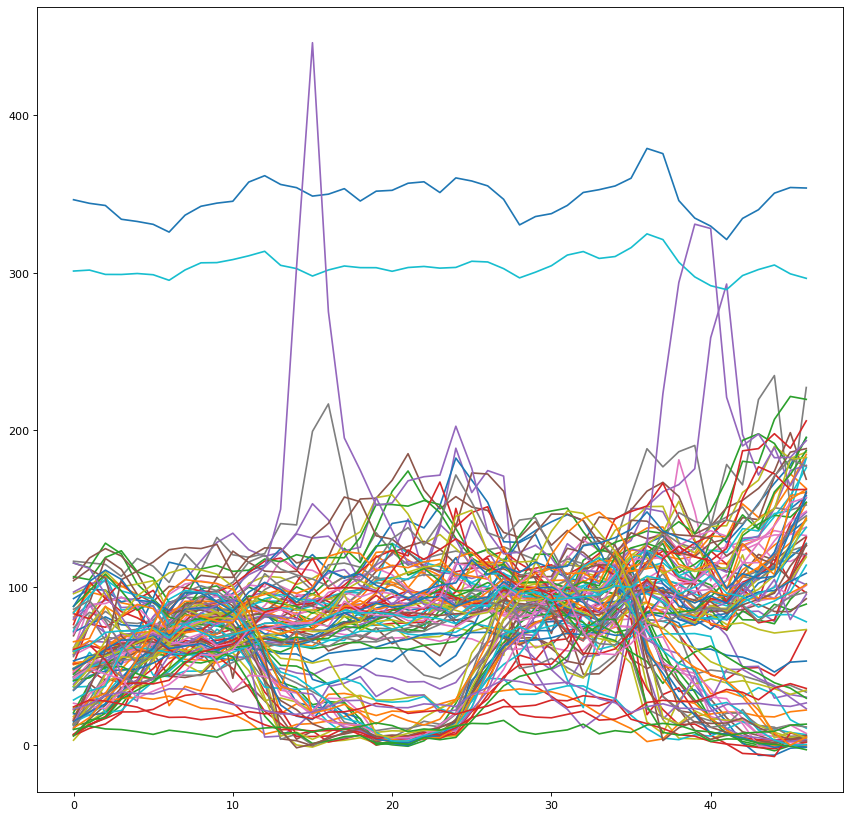

In [24]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
regr_3 = MultiOutputRegressor(Ridge(random_state=123)).fit(x_train, y_train)

plot_model_prediction(regr_3)

##Cross Validation

In [25]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Compute score
scoresRegr = cross_val_score(regr, x_train, y_train)
scoresRegr2 = cross_val_score(regr_2, x_train, y_train)
scoresRegr3 = cross_val_score(regr_3, x_train, y_train)


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


##Statistical significant test

In [26]:
# Between linear and MLPRegressor
from scipy.stats import pearsonr
# If p > 0.05: H0 Rejected 
stat, p = pearsonr(scoresRegr, scoresRegr2)
print(p)
print(stat)

0.13131295375568075
0.765626052506868


In [27]:
# Between linear and MultiOutputRegressor
from scipy.stats import pearsonr
# If p > 0.05: H0 Rejected 
stat, p = pearsonr(scoresRegr, scoresRegr3)
print(p)
print(stat)

0.116735818664728
0.7837327298732639


In [28]:
# Between MultiOutputRegressor and MLPRegressor
from scipy.stats import pearsonr
# If p > 0.05: H0 Rejected 
stat, p = pearsonr(scoresRegr3, scoresRegr2)
print(p)
print(stat)

0.5417798444663433
0.3683966046778729


# Traitement des données de Londres

## Affichage des données

Dans cette partie nous allons travailler avec les données de Londres. Pour cela nous utilisons trois fichiers:


1.   London_historical_meo_grid.csv qui contient des données météo
2.   London_AirQuality_Stations.csv qui contient les données géorgraphiques des stations de mesure
3.   London_historical_aqi_forecast_stations_20180331.csv qui contient les valeurs des différentes particules


Nous commencons donc par lire les fichiers et afficher les données qu'ils contiennent.




In [29]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

meo = pd.read_csv('final_project_data/London_historical_meo_grid.csv', encoding='utf-8-sig', sep='\s*,\s*', engine='python')
location = pd.read_csv('final_project_data/London_AirQuality_Stations.csv')
location.sort_values('need_prediction',ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)
pollution = pd.read_csv('final_project_data/London_historical_aqi_forecast_stations_20180331.csv')


print("=========================Pollution ================")
print(pollution)

print("=========================meteo ================")
print(meo)
print('Min:', meo.utc_time.min())
print('Max:', meo.utc_time.max())

print("=============== Location ========")
print(location)

=========================Pollution ================
        Unnamed: 0 MeasurementDateGMT station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)
0                0      2017/1/1 0:00        CD1           40.0          44.4         36.6
1                1      2017/1/1 1:00        CD1           31.6          34.4         46.2
2                2      2017/1/1 2:00        CD1           24.7          28.1         38.3
3                3      2017/1/1 3:00        CD1           21.2          24.5         32.8
4                4      2017/1/1 4:00        CD1           24.9          23.0         28.1
...            ...                ...        ...            ...           ...          ...
141656       10892    2018/3/30 20:00        TH4            3.5          11.2         44.3
141657       10893    2018/3/30 21:00        TH4            4.7          12.3         52.8
141658       10894    2018/3/30 22:00        TH4            5.4          14.0         54.7
141659       10895    2018/3/30 23:00 

On voit que dans le fichiers de pollution les valeurs sont données par rapport aux stations_id.
Dans le fichiers météo les valeurs sont données par rapport aux coordonées de latitude et de longitude.
Nous allons donc devoir faire le liens entre les données de pollution et les données métorologiques afin de pouvoir faire travailler des algorithmes dessus.
 

## Liaison de la météo et de la pollution

Nous commençons par supprimer toutes les stations qui ne sont pas nécessaire dans notre dataFrame location. Toutes les stations supprimées sont celles dont nous n'avons la prédiction n'est pas demandée.

Nous supprimons également toutes les colonnes qui ne sont pas nécessaires pour notre travail. Nous gardons donc que les id des stations avec leurs coordonées géographique.

In [30]:
try:
  location = location[location.need_prediction == True]
except:
  pass


if location.shape[1] != 3:
  location = location.drop('api_data', 1)
  location = location.drop('need_prediction', 1)
  location = location.drop('historical_data', 1)
  location = location.drop('SiteType', 1)
  location = location.drop('SiteName', 1)




print(location)



   Unnamed: 0   Latitude  Longitude
2         BL0  51.522287  -0.125848
3         CD9  51.527707  -0.129053
4         CD1  51.544219  -0.175284
8         GN0  51.490532   0.074003
9         GR4  51.452580   0.070766
10        GN3  51.486957   0.095111
11        GR9  51.456357   0.040725
14        HV1  51.520787   0.205461
17        KF1  51.521047  -0.213492
18        LW2  51.474954  -0.039641
21        ST5  51.389287  -0.141662
22        TH4  51.515046  -0.008418
23        MY7  51.522540  -0.154590


Maintenant que la dataFrame location est nettoyée, nous pouvons commencer avec le reste.
Nous copions tout d'abord polution dans une variable globale aq qui nous permettera d'ajouter des éléments sans toucher à la dataFrame originale.

Nous trions ensuite aq par les station_id et l'affichons

In [31]:
aq = pollution.copy()
location = location.reset_index(drop=True)

aq = aq.sort_values(['station_id'])
print(aq)

        Unnamed: 0 MeasurementDateGMT station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)
16344         5447    2017/8/15 23:00        BL0            8.3          16.3         77.5
14534         3637     2017/6/1 13:00        BL0            8.5          12.1         13.6
14533         3636     2017/6/1 12:00        BL0            9.7          12.0         18.1
14532         3635     2017/6/1 11:00        BL0            7.9          12.2         18.1
14531         3634     2017/6/1 10:00        BL0            5.2          15.3         18.4
...            ...                ...        ...            ...           ...          ...
134398        3634     2017/6/1 10:00        TH4            4.9          19.2         46.8
134399        3635     2017/6/1 11:00        TH4            4.5          18.3         50.0
134400        3636     2017/6/1 12:00        TH4            5.9          19.9         47.1
134392        3628      2017/6/1 4:00        TH4           10.1          23.2         47.3

Nous remarquons que les dates de aq et location ne sont malheureusement pas sous le même format. De plus nous voyons également qu'elles ne correspondent pas aux dates voulues. Pour cela nous allons utiliser deux fonctions que nous avons écrite:

1.   getMeoTime(time): Cette fonction prends en argument la date de la prise de mesure dans la dataFrame aq et la traduit pour avoir la même forme de date que meo. Nous itérons donc sur les éléments de "*MeasurementDateGMT*", les traduisons et les remettons à leurs place. Ainsi toutes les dates auront le même format.
2.   daterange(date1,date2): Cette fonction nous permet de prendre les données uniquement dans les dates voulues.



In [32]:
from datetime import timedelta, date, datetime
#2017-01-01 00:00:00
def getMeoTime(time):
  try:
    r = datetime.strptime(time+":00",'%Y/%m/%d %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S')
    return r
  except:
    return time

def daterange(date1, date2):
    for m in range(int ((date2 - date1).days)+1):
        for n in range(24):
            yield date1 + timedelta(days=m,hours=n)

# On prend la partie qui nous interrese
for x in range(aq.shape[0]):
  #print(aq.at[x,'MeasurementDateGMT'])
  aq.at[x,'MeasurementDateGMT']= getMeoTime(aq.at[x,'MeasurementDateGMT'])
aq = aq.sort_values(['MeasurementDateGMT'])
start_dt = datetime(2017, 1, 1, 0, 0, 0)
end_dt = datetime(2018, 3, 22, 23, 0, 0)
ran = daterange(start_dt, end_dt)
times = [r.strftime("%Y-%m-%d %H:%M:%S") for r in ran]

aq = aq.loc[(aq.MeasurementDateGMT >= times[0]) & (aq.MeasurementDateGMT <= times[-1])]
meo = meo.loc[(meo.utc_time >= times[0]) & (meo.utc_time <= times[-1])]
aq = aq.sort_values(['station_id','MeasurementDateGMT'])
aq = aq.reset_index(drop=True)
meo = meo.reset_index(drop=True)
print(aq)
print(meo)

        Unnamed: 0   MeasurementDateGMT station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)
0                0  2017-01-01 00:00:00        BL0           30.8          31.6         10.8
1                1  2017-01-01 01:00:00        BL0           22.9          34.6         17.3
2                2  2017-01-01 02:00:00        BL0           18.4          25.2         14.2
3                3  2017-01-01 03:00:00        BL0           19.5          24.0         14.8
4                4  2017-01-01 04:00:00        BL0           22.1          26.7         16.7
...            ...                  ...        ...            ...           ...          ...
139147       10699  2018-03-22 19:00:00        TH4            9.6          16.3         47.1
139148       10700  2018-03-22 20:00:00        TH4           10.6          10.4         41.6
139149       10701  2018-03-22 21:00:00        TH4            9.9          12.5         38.1
139150       10702  2018-03-22 22:00:00        TH4            6.7     

Dans la dataFrame aq il manque également les coordonmées des stations. Nous allons donc ajouter les coordonées qui correspondent en fonction de leur nom en utisant la dataFrame location. 
Pour cela nous utilisons la fonction numpy select qui nous permet de choisir la longitude en fonction du nom de la station. 
Par exemple, pour la latitude on choisit la sation qui correspond à la position true dans choice. On fait pareil longitude et affichons la nouvelle version d'aq.

In [33]:
import numpy as np

conditions = [(aq["station_id"] == location.at[0,'Unnamed: 0']),(aq["station_id"] == location.at[1,'Unnamed: 0']),
              (aq["station_id"] == location.at[2,'Unnamed: 0']),(aq["station_id"] == location.at[3,'Unnamed: 0']),
              (aq["station_id"] == location.at[4,'Unnamed: 0']),(aq["station_id"] == location.at[5,'Unnamed: 0']),
              (aq["station_id"] == location.at[6,'Unnamed: 0']),(aq["station_id"] == location.at[7,'Unnamed: 0']),
              (aq["station_id"] == location.at[8,'Unnamed: 0']),(aq["station_id"] == location.at[9,'Unnamed: 0']),
              (aq["station_id"] == location.at[10,'Unnamed: 0']),(aq["station_id"] == location.at[11,'Unnamed: 0']),
              (aq["station_id"] == location.at[12,'Unnamed: 0'])]
choices = location['Latitude']
aq['Latitude'] = np.select(conditions,choices,default=1)
choices = location['Longitude']
aq['Longitude'] = np.select(conditions,choices,default=1)
try:
  aq = aq.drop('Unnamed: 0', 1)
except:
  pass
print(aq)          


         MeasurementDateGMT station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)   Latitude  Longitude
0       2017-01-01 00:00:00        BL0           30.8          31.6         10.8  51.522287  -0.125848
1       2017-01-01 01:00:00        BL0           22.9          34.6         17.3  51.522287  -0.125848
2       2017-01-01 02:00:00        BL0           18.4          25.2         14.2  51.522287  -0.125848
3       2017-01-01 03:00:00        BL0           19.5          24.0         14.8  51.522287  -0.125848
4       2017-01-01 04:00:00        BL0           22.1          26.7         16.7  51.522287  -0.125848
...                     ...        ...            ...           ...          ...        ...        ...
139147  2018-03-22 19:00:00        TH4            9.6          16.3         47.1  51.515046  -0.008418
139148  2018-03-22 20:00:00        TH4           10.6          10.4         41.6  51.515046  -0.008418
139149  2018-03-22 21:00:00        TH4            9.9          12.5      

Maintenant que nous avons la bonne forme dans aq il faut qu'on trouve un moyen pour faire correspondre chaque station de mesure de pollution à une station de mesure de la météo.
Pour cela, nous allons chercher les valeurs qui correspondent le plus dans les coordonées de manière à avoir la météo qu'il faisait à la station de mesure.
Pour cela, nous créons la fonction nearestValue. Cette fonction nous permet de trouver les valeurs les plus proches dans deux listes. 
Nous créons donc une variable allValue qui nous permettera donc de savoir quelle lagitude et longitutde prendre.

In [34]:
from functools import partial

# Calcule la valeur la plus proche pour une pair de valeur dans une liste de duplet
def nearestValue(liste,value):
  dist=lambda s,d: (s[0]-d[0])**2+(s[1]-d[1])**2 
  return min(liste, key=partial(dist, value))

# Maintenant on veux trouver la latitude et la longitude la plus proche de meo dans aq pour récuperer les donnés météo correspondant
A = meo["longitude"]
B = meo["latitude"]
C = list(zip(A, B))


#On récupere toute les valeurs de longitude et latitude
D = location["Longitude"]
E = location["Latitude"]
F = list(zip(D,E))

allValue = [nearestValue(C,[float(element[0]),float(element[1])]) for element in F]

On va maintenant essayer d'avoir la météo dans aq. Pour cela nous commencons par supprimer tous les éventuels doublons.

In [35]:
if not aq.index.name == 'MeasurementDateGMT':
    aq = aq.set_index(['MeasurementDateGMT'])

aq_concat = aq[aq.station_id == aq.station_id.unique()[0]]

stations = aq.station_id.unique()[1:]
aq_concat = aq_concat.loc[~aq_concat.index.duplicated(keep='first')]



for i in range(1,13):
  aq_concat2 = aq[aq.station_id == aq.station_id.unique()[i]]
  aq_concat = aq_concat.append(aq_concat2.loc[~aq_concat2.index.duplicated(keep='first')])
times = aq_concat.index
aq = aq_concat # On enleve les duplciation dans aq
location = location.reset_index(drop=True)

Nous allons à présent ajouter les éléments de la météo dans aq. Pour cela, nous créons une variable intermédiaire appelée station1. Dans cette dataFrame nous ajoutons les valeur de aq et nous ajoutons les valeurs contenues dans météo pour les coordonées les plus proches à l'aide de la variable allValue qui contient les paire de valeur de coordonées les plus proches.
Nous copions ensuite la variable intermédiare dans aq de manière à pouvoir continuer à travailler avec.

In [36]:
stationBool = aq['Longitude'] == location['Longitude'][0]
stationBool2 = aq['Latitude'] == location['Latitude'][0] 
station1 = aq[stationBool & stationBool2]
meoBool = meo['longitude'] == allValue[0][0] 
meoBool2 = meo['latitude'] == allValue[0][1]
meo1 = meo[meoBool & meoBool2]

station1 = station1.reset_index(drop=True)

meo1 = meo1.reset_index(drop=True)
station1 = pd.concat([station1, meo1[["temperature",'pressure','humidity','wind_direction','wind_speed/kph']]], axis=1)


for i in range(1,13):
  stationBool = aq['Longitude'] == location['Longitude'][i]
  stationBool2 = aq['Latitude'] == location['Latitude'][i]
  stationPart = aq[stationBool & stationBool2]
  meoBool = meo['longitude'] == allValue[i][0] 
  meoBool2 = meo['latitude'] == allValue[i][1]
  meoPart = meo[meoBool & meoBool2]
  stationPart = stationPart.reset_index(drop=True)

  meoPart = meoPart.reset_index(drop=True)
  station1 = station1.append(pd.concat([stationPart, meoPart[["temperature",'pressure','humidity','wind_direction','wind_speed/kph']]], axis=1))

station1 = station1.reset_index(drop=True)

aq = station1.copy()
print(aq)



       station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)   Latitude  Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
0             BL0           30.8          31.6         10.8  51.522287  -0.125848         5.80   1019.93     91.38          221.79           15.57
1             BL0           22.9          34.6         17.3  51.522287  -0.125848         5.84   1018.73     89.96          220.34           16.49
2             BL0           18.4          25.2         14.2  51.522287  -0.125848         5.89   1017.53     88.54          219.03           17.41
3             BL0           19.5          24.0         14.8  51.522287  -0.125848         5.93   1016.33     87.12          217.86           18.35
4             BL0           22.1          26.7         16.7  51.522287  -0.125848         6.12   1015.38     87.54          216.18           18.78
...           ...            ...           ...          ...        ...        ...          ...       ...       ...    

Comme nous avons perdu la date, nous la remetons manuellement depuis une sauvegarde faite plus haut.

In [37]:
try:
  aq.insert(0, 'utc_time', times)
except:
  pass
aq = aq.sort_values(['utc_time','station_id'])
aq = aq.reset_index(drop=True)
print(aq)

                   utc_time station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)   Latitude  Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
0       2017-01-01 00:00:00        BL0           30.8          31.6         10.8  51.522287  -0.125848         5.80   1019.93     91.38          221.79           15.57
1       2017-01-01 00:00:00        CD1           40.0          44.4         36.6  51.544219  -0.175284         5.91   1019.61     90.76          221.29           15.91
2       2017-01-01 00:00:00        CD9           28.7          32.3         90.6  51.527707  -0.129053         5.80   1019.93     91.38          221.79           15.57
3       2017-01-01 00:00:00        GN0           50.7          63.3         24.7  51.490532   0.074003         5.61   1020.16     92.41          223.73           15.04
4       2017-01-01 00:00:00        GN3           59.6          47.5         18.4  51.486957   0.095111         5.61   1020.16     92.41          223.73         

## Nettoyage et séparation des données

Comme nous voyons qu'il y a des donneées incomplètes, nous appliquons une interpolation directement sur la dataFrame afin d'avoir des donnèes complètes.

In [38]:
print("before inter",aq.isnull().sum().sum())
aq = aq.interpolate(method="linear")
print("After",aq.isnull().sum().sum())

before inter 58176
After 0


On va maintenant séparer nos données en train et data. Toutes les données avant le 21 mars sont données en train et nous gardons les données du 21 et 22 mars pour le test

In [39]:
aq = aq = aq.sort_values(['utc_time', 'station_id'])
if not aq.index.name == 'utc_time':
    aq = aq.set_index(['utc_time'])
x_trainDF = aq[aq.index < '2018-03-21']
x_testDF = aq[aq.index > '2018-03-21']
Y = aq[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']]
y_trainDF = Y[aq.index < '2018-03-21']
y_testDF = Y[aq.index > '2018-03-21']

Nous obtenons donc les dataFrame suivantes:

In [40]:
print(x_testDF)
print(x_trainDF)
print(y_trainDF)
print(y_testDF)

                    station_id  PM2.5 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)   Latitude  Longitude  temperature  pressure  humidity  wind_direction  wind_speed/kph
utc_time                                                                                                                                                       
2018-03-21 00:00:00        BL0           8.40     21.400000         49.5  51.522287  -0.125848         2.44   1028.91     76.29          345.80            6.25
2018-03-21 00:00:00        CD1          11.10     26.600000         63.5  51.544219  -0.175284         2.45   1028.77     76.08          344.03            6.11
2018-03-21 00:00:00        CD9           9.00     26.100000         69.0  51.527707  -0.129053         2.44   1028.91     76.29          345.80            6.25
2018-03-21 00:00:00        GN0          12.50     25.900000         71.1  51.490532   0.074003         2.30   1028.89     77.49          347.47            6.79
2018-03-21 00:00:00        GN3          

Nous allons maintenant mettre toutes les données sur une seule ligne par heure afin d'avoir une prédiction par heure.
Pour celà, nous faisons une reshape des dataFrame de manière à ce que pour chaque heure nous ayons toutes les données sur une seule ligne.

Ensuite nous supprimons le dernier éléments des x et le premier des y de manière à ce que les y ait une heure d'avance sur les x. Ainsi le but est de prédire le taux de pollution à une heure précise en fonction de l'heure d'avant.

In [41]:
import numpy as np
def reshape(frame, nbStation=13):
  return frame.to_numpy().reshape(int(frame.shape[0]/nbStation),nbStation*frame.shape[1])
try:
  x_trainDF = x_trainDF.drop(['station_id',],axis=1)
except:
  pass
try:
  x_testDF = x_testDF.drop(['station_id'],axis=1)
except:
  pass
  
x_train = reshape(x_trainDF)
x_test = reshape(x_testDF)
y_test = reshape(y_testDF)
y_train = reshape(y_trainDF)

x_train = np.delete(x_train,-1,0)
x_test = np.delete(x_test,-1,0)
y_train = np.delete(y_train,0,0)
y_test = np.delete(y_test,0,0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10655, 130)
(47, 130)
(10655, 26)
(47, 26)


##Modèle

Dans cette partie nous allons comparer plusieurs modèles et utiliseront la fonction suivante pour analyser leur résultats

In [42]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, median_absolute_error, accuracy_score
def plot_model_prediction(mod):
        
    prediction = mod.predict(x_test)
   
    print("Test")
    print("The Explained Variance: %.2f" % mod.score(x_test, y_test))
    print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_test, prediction))
    print("The Median Absolute Error: %.2f" % median_absolute_error(y_test, prediction))


    print("Train")
    pred_train = mod.predict(x_train)
    print("The Explained Variance: %.2f" % mod.score(X_train, y_train))
    print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_train, pred_train))
    print("The Median Absolute Error: %.2f" % median_absolute_error(y_train, pred_train))

    y_prediction = np.copy(y_test)
    y_prediction[:] = prediction

    fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(y_test)
    plt.show()

    fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(y_prediction)
    plt.show()


###Régression linéaire


Le principe de la régression est de classfier en faisant une regréssion linéaire entre les différentes catégories

Test
The Explained Variance: 0.48
The Mean Absolute Error: 3.50 
The Median Absolute Error: 2.66
Train
The Explained Variance: 0.85
The Mean Absolute Error: 2.90 
The Median Absolute Error: 2.08


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


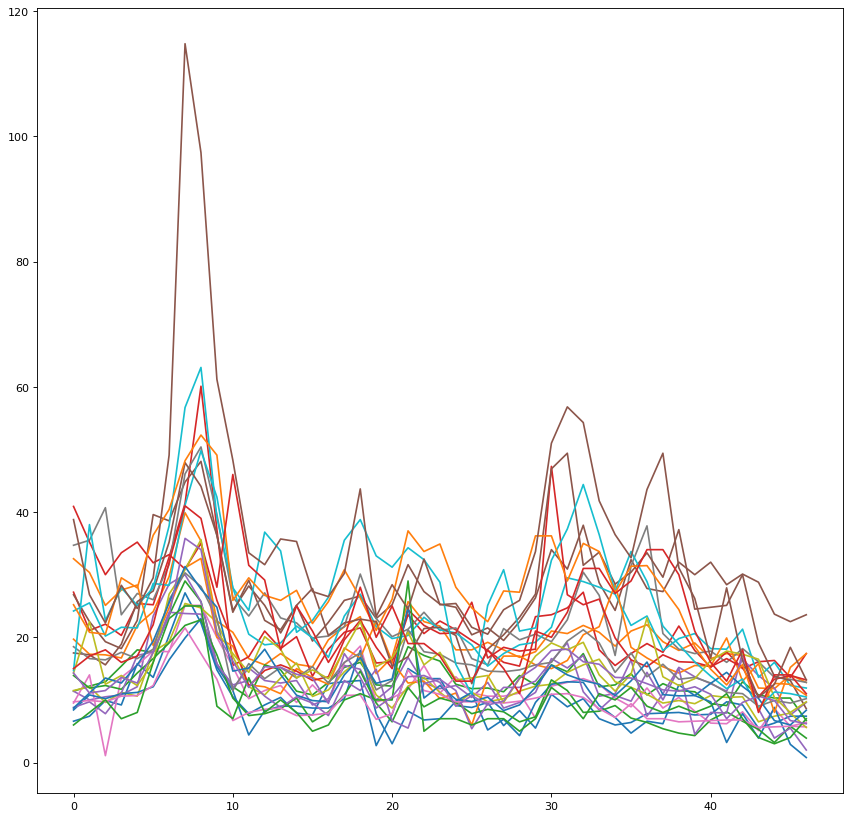

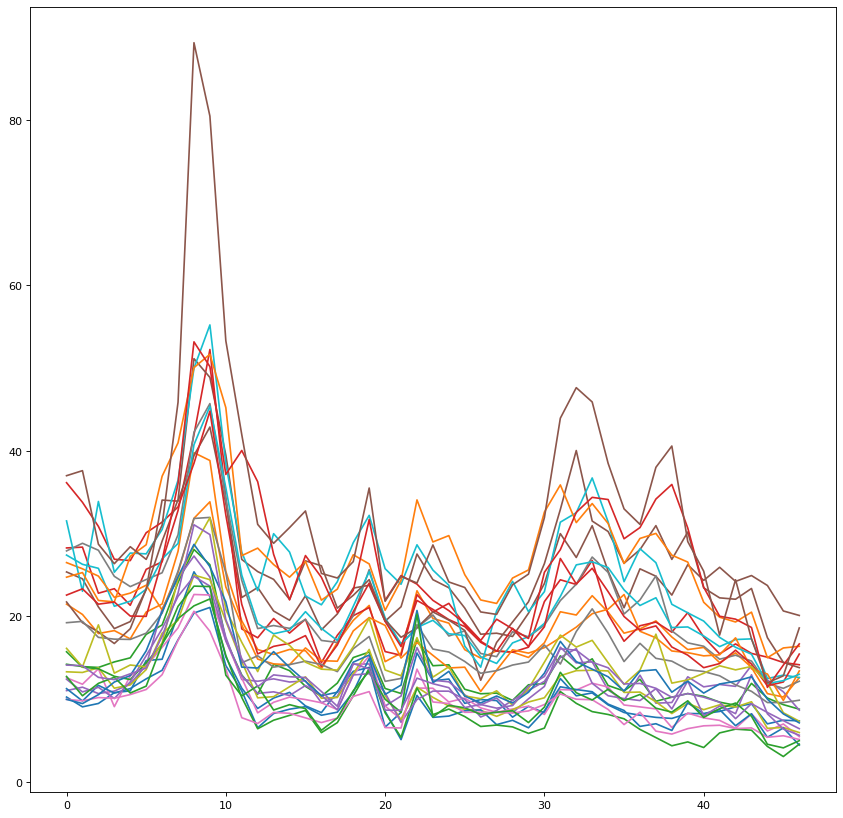

In [43]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
X_train = x_train
regr.fit(X_train, y_train)

plot_model_prediction(regr)

Nous voyons qu'à priori ce modèle semble relativement bien fonctionner avec une erreur moyenne de 3.5 lors des tests.


### Neural network MLPRegressor

C'est modèle qui utilise un perceptron à plusieurs étage et qui cherche à optimiser le MSE

Test
The Explained Variance: 0.44
The Mean Absolute Error: 3.77 
The Median Absolute Error: 3.02
Train
The Explained Variance: 0.82
The Mean Absolute Error: 3.39 
The Median Absolute Error: 2.64


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


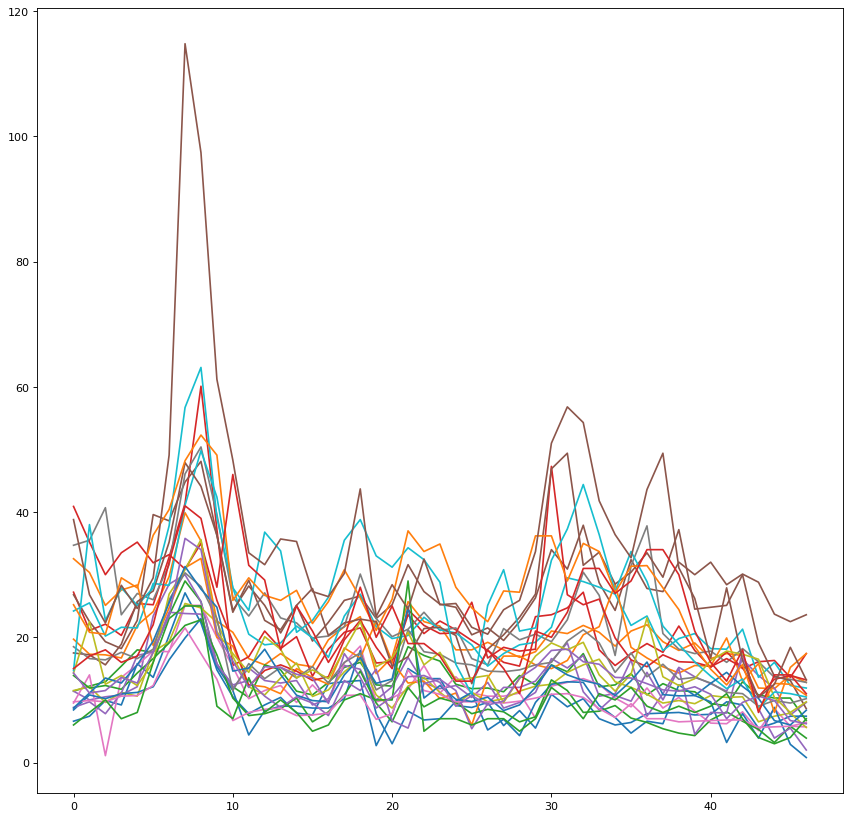

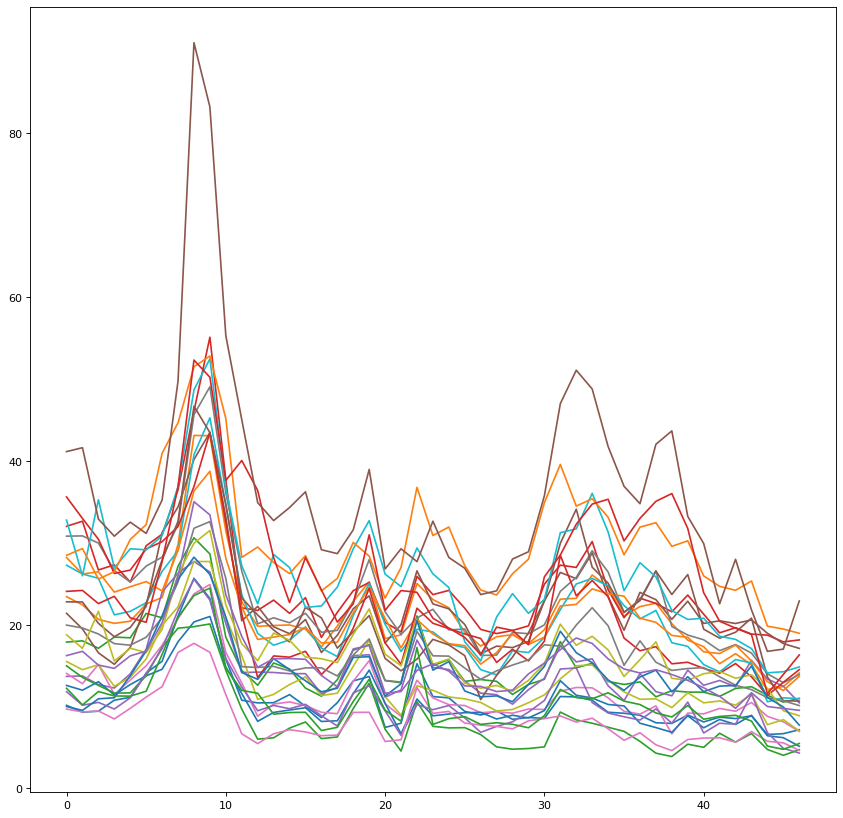

In [44]:
from sklearn.neural_network import MLPRegressor

regr_2 = MLPRegressor(random_state=1, max_iter=1000) # Vary hidden nodes
regr_2.fit(X_train, y_train)

plot_model_prediction(regr_2)

Nous voyons qu'avec une erreure moyenne de 3.77 lors du test, ce modèle est assez performant. 

### Ridge regression (MultiOutputRegressor)

C'est une regression mutlti cible.
Cette stratégie consite à fitter un regresseur par cible. C'est une stratégie pour étendre des régresseurs qui ne supportent pas plusieurs cibles comme c'est le cas ici (On cherche à estimer plus d'un paramètre)

Test
The Explained Variance: 0.46
The Mean Absolute Error: 3.50 
The Median Absolute Error: 2.67
Train
The Explained Variance: 0.86
The Mean Absolute Error: 2.90 
The Median Absolute Error: 2.08


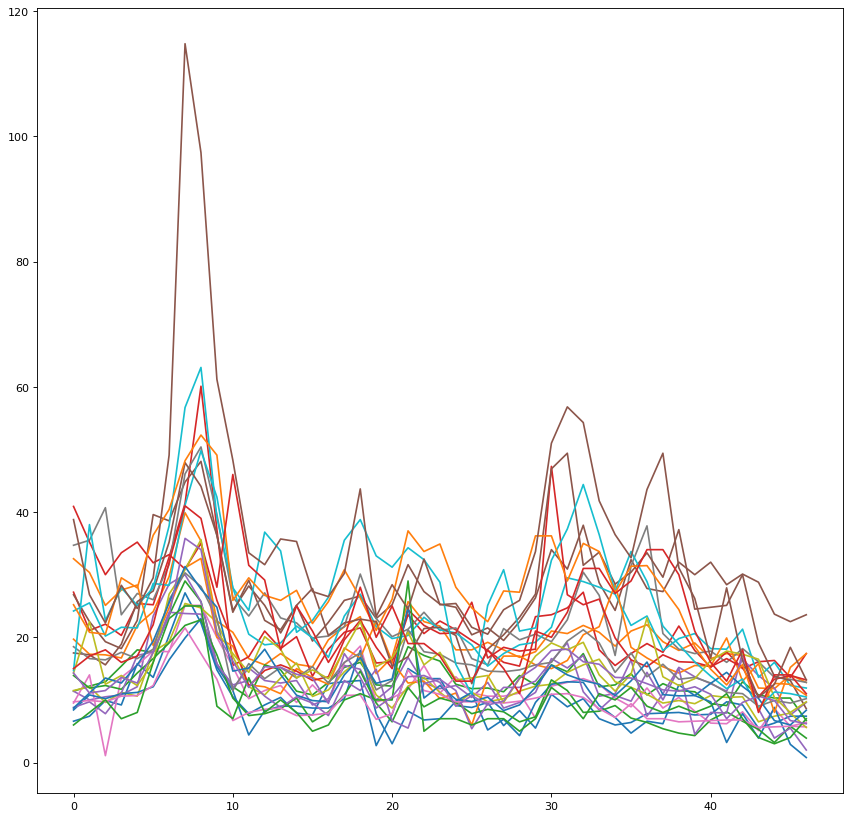

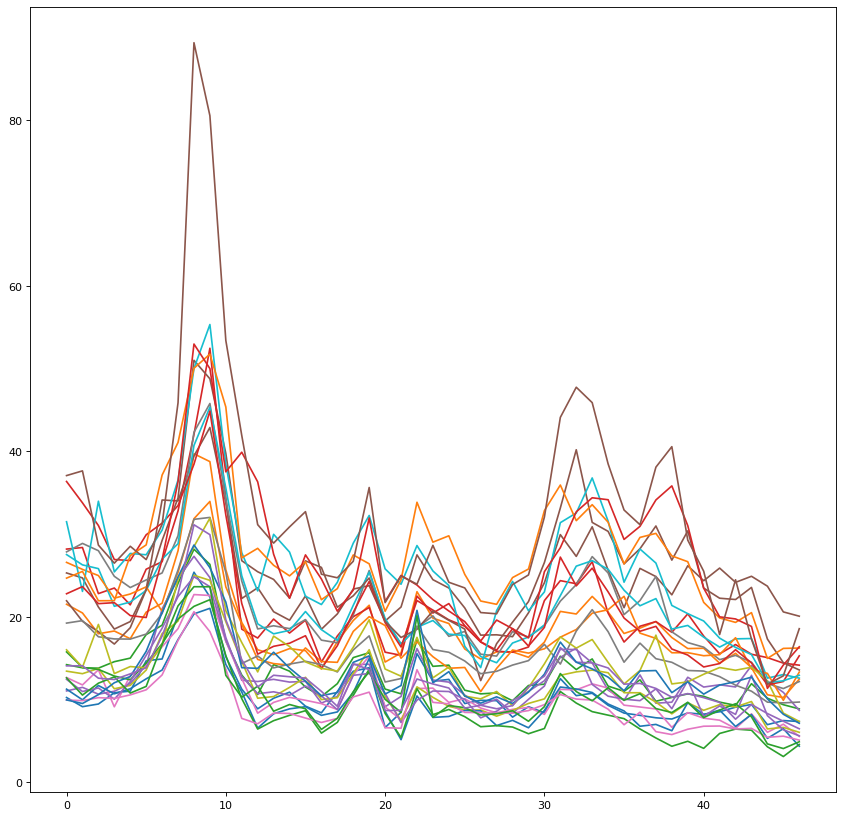

In [45]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
regr_3 = MultiOutputRegressor(Ridge(random_state=123)).fit(x_train, y_train)

plot_model_prediction(regr_3)


## Cross validation et statistical significant tests

Nous commencons par effectuer la cross-validation. Ceci consiste à séparer notre ensemble de données en plusieurs paire d'ensemble [test,train]. De cette manière on peut mesurer l'efficacité d'un modèle sur plusieurs ensembles de test train.

In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scoresRegr = cross_val_score(regr, x_train, y_train)
scoresRegr2 = cross_val_score(regr_2, x_train, y_train)
scoresRegr3 = cross_val_score(regr_3, x_train, y_train)

print("Score regression linéaire",scoresRegr)
print("Score regression MlPregressor",scoresRegr2)
print("Score regression Ridge regression",scoresRegr3)



C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


Score regression linéaire [0.89872761 0.61239018 0.69088577 0.77132658 0.8453092 ]
Score regression MlPregressor [0.88401098 0.60798505 0.62874834 0.74654544 0.81524443]
Score regression Ridge regression [0.90261816 0.72034877 0.71494993 0.8166383  0.85396259]


On voit que la cross validation permet de voir que les modèles n'ont pas les mêmes performances en fonction des des données de test et d'entraînement. Par exemple, la régression linéaire à un score de 90% sur le premier ensemble contre seulement de 60 % sur le deuxième.

In [47]:
#between linear and MLPRegressor
from scipy.stats import pearsonr
stat, p = pearsonr(scoresRegr, scoresRegr2)
print(p)

0.002675103606793419


In [48]:
# between linear and MultiOutputRegressor
from scipy.stats import pearsonr
stat, p = pearsonr(scoresRegr, scoresRegr3)
print(p)

0.00884277675965391


In [49]:
#between MultiOutputRegressor and MLPRegressor
from scipy.stats import pearsonr
stat, p = pearsonr(scoresRegr3, scoresRegr2)
print(p)

0.00043310498335152615


# Conclusion

En conclusion dans ce travail nous avons travaillés avec deux ensembles de données: Bejing et Londre.
Nous avons manipulé ces données afin d'avoir les données voulue dans la forme voulue afin d'appliques des modèles de prédictions.
Pour chacunes des données nous avons comparé trois modèles différents.
Nous allons maintenant analyser le résultat.
Après avoir travaillé sur les données de Bejing et Londres de manières à les rendres utilisables, nous avons utiliser trois modèles différents:

1.   Régression linéraire
2.   MLPregressor
3.   MultiOutPut Regressor.

Nous remarquons que les multiOutPut regressor est le plus performant pour les données de Bejing.

Dans le cas de Londres le modèle le plus performant sont la regréssion linéaire et le multiOutPut regressor.

Cependant, dans le cas de Londres les modèles sont semblables aux résutats des significant tests. Cela peut être due à une mauvaise interpolation des données manquantes.

